In [ ]:
! pip install textract
! apt-get install antiword catdoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
antiword is already the newest version (0.37-11build1).
catdoc is already the newest version (1:0.95-4.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
# Librerias
import os
import pandas as pd
import textract
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.express as px
from plotly import  graph_objects as go

In [ ]:
# Descargar el archivo comprimido desde dopbox
! wget 'https://dl.dropboxusercontent.com/s/3ff5b7h3m1kujl9/HV_Proyecto%202021.zip'
#https://www.dropbox.com/s/jpcngcxidr4ox45/HV_Proyecto%202021.zip

--2021-06-02 02:46:29--  https://dl.dropboxusercontent.com/s/3ff5b7h3m1kujl9/HV_Proyecto%202021.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.5.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75480143 (72M) [application/zip]
Saving to: ‘HV_Proyecto 2021.zip.1’

HV_Proyecto 2021.zi 100%[===================>]  71.98M  51.8MB/s    in 1.4s    

2021-06-02 02:46:31 (51.8 MB/s) - ‘HV_Proyecto 2021.zip.1’ saved [75480143/75480143]



#### Descomprimir

In [ ]:
# Descomprimir el archivo con la libreria ZipFile
with ZipFile('HV_Proyecto 2021.zip') as archivo2:
    archivo2.extractall()

In [ ]:
# Crear una variable con la lista de carpetas
contenido = os.listdir('HV_Proyecto 2021') 

In [ ]:
contenido

['Área de IT',
 'RPA',
 'Área Administrativa',
 'WEB_DEVELOPER',
 'Analista_datos',
 'Área Operativa']

####Categorias

In [ ]:
# Crear el dataFrame con la informacion extraida
df_hojas=pd.DataFrame(columns=['Texto', 'Categoria']) #Crear dataframe para guardar los textos y las categorias
Base_str='HV_Proyecto 2021/'
for area in contenido: #Iterar sobre las carpetas de cada area
  hoja=os.listdir(Base_str+area) # Crear una lista de las hv's en cada carpeta
  for hv in hoja: #Iterar sobre la lista de hojas de vida de cada carpeta
    if hv.endswith('pdf') or hv.endswith('docx') or hv.endswith('doc'): # Seleccionar los archivos que terminen en '.pdf', '.docx' o '.doc'
      texto=textract.process('/content/HV_Proyecto 2021/'+area+'/'+hv).decode('utf-8') #Extraer el texto de los archivos
      df_hojas=df_hojas.append({'Texto':texto, 'Categoria':area}, ignore_index=True) # añadir el texto y su categoria al df

print(df_hojas['Categoria'].value_counts())
df_hojas

Analista_datos         58
RPA                    52
Área Operativa         50
Área Administrativa    50
WEB_DEVELOPER          49
Área de IT             43
Name: Categoria, dtype: int64


,Texto,Categoria
0,Tatiana andrea EspondaOspinaIngeniería de sis...,Área de IT
1,Kr77b #72 a 60 \nBogotá D.C \nTabora \n3166249...,Área de IT
2,\n \n\n José Eduardo Patiño Santafé \n \n ...,Área de IT
3,RESUMEN LABORAL\n\nCoordinador de servicios co...,Área de IT
4,"XAVIER R. BERRIO \n\nIT PROJECT MANAGER (PMP),...",Área de IT
...,...,...
297,Diego Felipe Torres Rincon \n \nCalle 146f # 7...,Área Operativa
298,education\n\n\t\n\n\t\n\n\n\n\n\nUniversidad a...,Área Operativa
299,\n\nARQ. RICARDO MAURICIO RODRÍGUEZ APARICIO ...,Área Operativa
300,IVAN CAMILO PACHECO ENCISO \n\n \n\nAdminist...,Área Operativa


In [ ]:
# Exportar el dataframe a un archivo .csv
df_hojas.to_csv('hojas.csv', index=False)

In [ ]:
# generar una lista con todas las palabras de la columna Texto
df_hojas['Texto'][1].split()

####Pre-Procesado

Se tienen en cuenta para eliminar los correos electronicos y palabras de un solo caracter.

In [ ]:
# Librerias para pre-procesado del texto
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# descargar stopwords en ingles y español
nltk.download('stopwords')
stopwords_sp = stopwords.words('spanish')
stopwords_en = stopwords.words('english')
spanishStemmer=SnowballStemmer("spanish")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Preprocesamiento del texto
df_hojas['pre-procesado']=""
cadena=""
for i in range(0, len(df_hojas['Texto'])):
    dep=df_hojas['Texto'][i]            # Guardar el contenido de la celda en la variable dep
    dep=dep.lower()                 # Convertir a minuscula
    dep=dep.split()                 # Generar un array con las palabras de cada hoja de vida
    for palabra in dep:             #Recorrer el array
      if '@' in palabra:# Identificar los mails buscando las palabras que contienen "@", para borrarlos                                         
        index=dep.index(palabra)    #Captura el indice donde se encuentra el correo
        dep.pop(index)              #Borrar el correo
    dep=' '.join(dep)               #Volver a generar un string con las palabras
    dep=re.sub(r"[^a-zA-Z'áéíóúñ\s]", " ", dep) # Dejar solo letras
    dep=dep.split()                 # crear array con las palabras
    texto=[palabra for palabra in dep if palabra not in stopwords_sp] # Eliminar palabras vacias
    texto=[palabra for palabra in texto if palabra not in stopwords_en]
    cadena=' '.join(texto)    # volver a generar una cadena con las palabras
    df_hojas['pre-procesado'][i]=cadena # Guardar el texto en la columna pre-procesado
    cadena=""

In [ ]:
df_hojas

,Texto,Categoria,pre-procesado
0,Tatiana andrea EspondaOspinaIngeniería de sis...,Área de IT,tatiana andrea espondaospinaingeniería sistema...
1,Kr77b #72 a 60 \nBogotá D.C \nTabora \n3166249...,Área de IT,kr b bogotá c tabora karen bibiana aponte mate...
2,\n \n\n José Eduardo Patiño Santafé \n \n ...,Área de IT,josé eduardo patiño santafé calle bogotá www l...
3,RESUMEN LABORAL\n\nCoordinador de servicios co...,Área de IT,resumen laboral coordinador servicios converge...
4,"XAVIER R. BERRIO \n\nIT PROJECT MANAGER (PMP),...",Área de IT,xavier r berrio project manager pmp scrum mana...
...,...,...,...
297,Diego Felipe Torres Rincon \n \nCalle 146f # 7...,Área Operativa,diego felipe torres rincon calle f bogotá colo...
298,education\n\n\t\n\n\t\n\n\n\n\n\nUniversidad a...,Área Operativa,education universidad abierta distancia unad u...
299,\n\nARQ. RICARDO MAURICIO RODRÍGUEZ APARICIO ...,Área Operativa,arq ricardo mauricio rodríguez aparicio lugar ...
300,IVAN CAMILO PACHECO ENCISO \n\n \n\nAdminist...,Área Operativa,ivan camilo pacheco enciso administrador empre...


In [ ]:
# Generar una lista con las palabras de la colunma pre-procesado
listaPalabras=" ".join([palabra for palabra in df_hojas['pre-procesado']]).split()
listaPalabras

In [ ]:
# ver cantidad de palabras a analizar
len(listaPalabras)

140159

In [ ]:
### Eliminar palabras de 1 solo caracter
pal_una_letra=[]
for pal in listaPalabras:
  if len(pal)<2:          # Seleccionar las palabras de 1 solo caracter
    pal_una_letra.append(pal) # Añadirlas a 1 lista
    index=listaPalabras.index(pal)    #Captura el indice donde se encuentra el correo
    listaPalabras.pop(index) # borrar las palabras en la lista de palabras original

In [ ]:
# Lista de valores unicos para las palabras de 1 caracter
mylist = list(set(pal_una_letra))
mylist

In [ ]:
# buscar y borrar las palabas de 1 caracter el texto de las hv's
index=0
for textos in df_hojas['pre-procesado']:
  textos=textos.split()
  texto=[palabra for palabra in textos if palabra not in mylist]
  texto=" ".join(texto)
  df_hojas['pre-procesado'][index]=texto
  index+=1

In [ ]:
df_hojas

,Texto,Categoria,pre-procesado
0,Tatiana andrea EspondaOspinaIngeniería de sis...,Área de IT,tatiana andrea espondaospinaingeniería sistema...
1,Kr77b #72 a 60 \nBogotá D.C \nTabora \n3166249...,Área de IT,kr bogotá tabora karen bibiana aponte mateus p...
2,\n \n\n José Eduardo Patiño Santafé \n \n ...,Área de IT,josé eduardo patiño santafé calle bogotá www l...
3,RESUMEN LABORAL\n\nCoordinador de servicios co...,Área de IT,resumen laboral coordinador servicios converge...
4,"XAVIER R. BERRIO \n\nIT PROJECT MANAGER (PMP),...",Área de IT,xavier berrio project manager pmp scrum manage...
...,...,...,...
297,Diego Felipe Torres Rincon \n \nCalle 146f # 7...,Área Operativa,diego felipe torres rincon calle bogotá colomb...
298,education\n\n\t\n\n\t\n\n\n\n\n\nUniversidad a...,Área Operativa,education universidad abierta distancia unad u...
299,\n\nARQ. RICARDO MAURICIO RODRÍGUEZ APARICIO ...,Área Operativa,arq ricardo mauricio rodríguez aparicio lugar ...
300,IVAN CAMILO PACHECO ENCISO \n\n \n\nAdminist...,Área Operativa,ivan camilo pacheco enciso administrador empre...


In [ ]:
# lista definitiva de palabras
listaPalabras=" ".join([palabra for palabra in df_hojas['pre-procesado']]).split()
listaPalabras

In [ ]:
# Generar csv con el dataframe limpio
df_hojas.to_csv('hojas_prep.csv', index=False)

In [ ]:
# Libreria para analizar frecuencia de palabras
import collections

In [ ]:
# Genera diccionario con la frecuencia de las palabras
ocurrencias=collections.Counter(listaPalabras)

In [ ]:
# Crear el dataframe con las frecuencias de cada palabra
Conteo_palabras = pd.DataFrame([[key, ocurrencias[key]] for key in ocurrencias.keys()], columns=['Palabra', 'Frecuencia']) #Crear un datafreame con la frecuencia

####Frecuencias

In [ ]:
# Organizar las frecuencias de forma descendente
Conteo_palabras = Conteo_palabras.sort_values('Frecuencia', ascending=False) #Ordenar de forma descendente
Conteo_palabras

,Palabra,Frecuencia
59,desarrollo,969
88,colombia,946
272,datos,907
439,gestión,743
188,bogotá,695
...,...,...
9610,ipartes,1
9611,monteávila,1
9612,champagnat,1
9613,accreditations,1


In [ ]:
#Top 30 de las frecuencias 
m = Conteo_palabras.iloc[0:30,:]

###Graficas

In [ ]:
Categorias = pd.value_counts(df_hojas['Categoria'], dropna=False)
labels = Categorias.index.to_list()
values = Categorias.to_list()
title = "Cv's  por Categorias"
trace = go.Pie(labels=labels, values=values)
layout =  go.Layout(
    title=title,
          height=600,
          margin=go.layout.Margin(l=0, r=200, b=100, t=100, pad=4)   
          ) 
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
fig = px.bar(m, x="Frecuencia", y="Palabra", orientation='h')
fig.show()

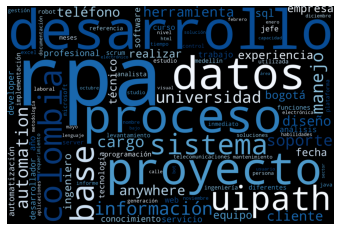

In [ ]:
# WordCloud para RPA
from wordcloud import WordCloud

WC_RPA = df_hojas[df_hojas['Categoria'] == 'RPA']['pre-procesado'].values
WC_RPA=''.join(WC_RPA)

text=WC_RPA
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Blues', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

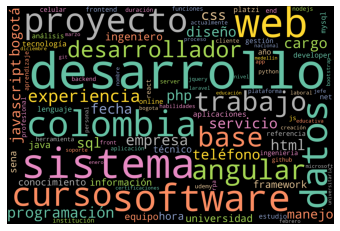

In [ ]:
# WordCloud para web developer
WC_Wdev = df_hojas[df_hojas['Categoria'] == 'WEB_DEVELOPER']['pre-procesado'].values
WC_Wdev=''.join(WC_Wdev)

text=WC_Wdev
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

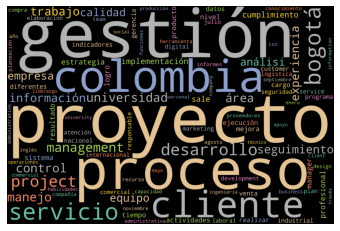

In [ ]:
# WordCloud para administrativo
WC_AreaAdm = df_hojas[df_hojas['Categoria'] == 'Área Administrativa']['pre-procesado'].values
WC_AreaAdm=''.join(WC_AreaAdm)

text=WC_AreaAdm
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

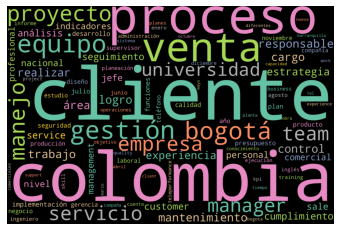

In [ ]:
# WordCloud para operativo
WC_AreaOper = df_hojas[df_hojas['Categoria'] == 'Área Operativa']['pre-procesado'].values
WC_AreaOper=''.join(WC_AreaOper)

text=WC_AreaOper
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

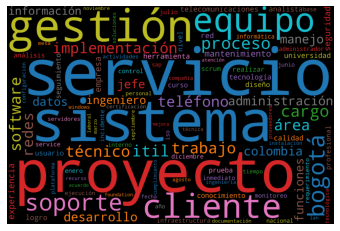

In [ ]:
# WordCloud para área IT
WC_AreaIT = df_hojas[df_hojas['Categoria'] == 'Área de IT']['pre-procesado'].values
WC_AreaIT=''.join(WC_AreaIT)

text=WC_AreaIT
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='tab10', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Modelos No Supervisados

- K-Means: Selección de número de segmentaciones a patir del metodo de codo.

- LDA: Se agrupa por las 6 categorias. 

In [ ]:
# Librerias para clustering
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df_hojas['pre-procesado'].values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

In [ ]:
# Clustering por k-means
ks = []
k_inertias = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

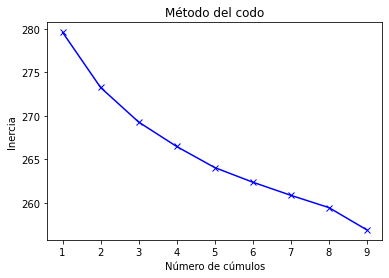

In [ ]:
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'bx-');

In [ ]:
# Se seleccionan dos categorias
k = 2
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Añadir la categia asignada para cada hoja de vida en la columna 'cluster'
df_hojas['cluster'] = model.labels_
df_hojas

####Cluster

In [ ]:
# Ver frecuencia de cada categoría, ingles=1, español = 0
df_hojas['cluster'].value_counts()

0    255
1     47
Name: cluster, dtype: int64

In [ ]:
# Seleccionar los datos de ingles
ingles = df_hojas[df_hojas['cluster'] == 1]
ingles.reset_index(drop=True, inplace=True)
ingles

,Texto,Categoria,pre-procesado,cluster
0,Cesar Mauricio García Ruiz. \nC.C: 1.023.883.8...,Área de IT,cesar mauricio garcía ruiz bogotá cel mail per...,1
1,\n\nCarlos Julio Peña Valencia \n\ncarlosjuli...,Área de IT,carlos julio peña valencia presentable hardwor...,1
2,...,Área de IT,cel https www linkedin com javier mauricio pro...,1
3,\n\n \n\n \n\n \nCellphone (+57)314612...,RPA,cellphone mail juan camilo palacio alcaraz pro...,1
4,Maria Andrea Domínguez\nOsorio\nEconomist / Ch...,Área Administrativa,maria andrea domínguez osorio economist chemic...,1
5,S A N T I A G O V A L L E J O C O R O N A D O...,Área Administrativa,business international administrator specialis...,1
6,"Cra. 17A # 127A – 91, Bogotá D.C. (Colombia) •...",Área Administrativa,cra bogotá colombia juliana caballero garcia e...,1
7,\n\n \n \n\n \n\n \n\n \n\n \n \n\n \n \n\n \...,Área Administrativa,curriculum vitae juan duque management logisti...,1
8,"ANDRÉS PEDRAZA\n\nSales, Marketing & Customer ...",Área Administrativa,andrés pedraza sales marketing customer experi...,1
9,\n\n \n\n \n\n \nPROFILE \n\nMore than 18 yea...,Área Administrativa,profile years experience project agile predict...,1


In [ ]:
# Seleccionar las hojas de español
Espanol=df_hojas[df_hojas['cluster']==0]
Espanol.reset_index(drop=True, inplace=True)
Espanol

,Texto,Categoria,pre-procesado,cluster
0,Tatiana andrea EspondaOspinaIngeniería de sis...,Área de IT,tatiana andrea espondaospinaingeniería sistema...,0
1,Kr77b #72 a 60 \nBogotá D.C \nTabora \n3166249...,Área de IT,kr bogotá tabora karen bibiana aponte mateus p...,0
2,\n \n\n José Eduardo Patiño Santafé \n \n ...,Área de IT,josé eduardo patiño santafé calle bogotá www l...,0
3,RESUMEN LABORAL\n\nCoordinador de servicios co...,Área de IT,resumen laboral coordinador servicios converge...,0
4,"XAVIER R. BERRIO \n\nIT PROJECT MANAGER (PMP),...",Área de IT,xavier berrio project manager pmp scrum manage...,0
...,...,...,...,...
250,Julián Andrés Briceño Murillo \n\n \n\n 31647...,Área Operativa,julián andrés briceño murillo calle perfil lab...,0
251,ALEXANDER CHAVES RIAÑO \n\n \n\nCelular: 317 ...,Área Operativa,alexander chaves riaño celular perfil profesio...,0
252,\n\nARQ. RICARDO MAURICIO RODRÍGUEZ APARICIO ...,Área Operativa,arq ricardo mauricio rodríguez aparicio lugar ...,0
253,IVAN CAMILO PACHECO ENCISO \n\n \n\nAdminist...,Área Operativa,ivan camilo pacheco enciso administrador empre...,0


In [ ]:
! pip install pyLDAvis

In [ ]:
# Librerias para realizar LDA
import pyLDAvis.gensim_models
from gensim.models import LdaModel 
from gensim.corpora import Dictionary
from pprint import pprint 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [ ]:
# Generar listas para el texto de cada hv, para poder ingrear la información al modelo LDA
index=0
for texto in Espanol['pre-procesado']:
  Espanol['pre-procesado'][index]=texto.split()
  index+=1
Espanol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Texto,Categoria,pre-procesado,cluster
0,Tatiana andrea EspondaOspinaIngeniería de sis...,Área de IT,"[tatiana, andrea, espondaospinaingeniería, sis...",0
1,Kr77b #72 a 60 \nBogotá D.C \nTabora \n3166249...,Área de IT,"[kr, bogotá, tabora, karen, bibiana, aponte, m...",0
2,\n \n\n José Eduardo Patiño Santafé \n \n ...,Área de IT,"[josé, eduardo, patiño, santafé, calle, bogotá...",0
3,RESUMEN LABORAL\n\nCoordinador de servicios co...,Área de IT,"[resumen, laboral, coordinador, servicios, con...",0
4,"XAVIER R. BERRIO \n\nIT PROJECT MANAGER (PMP),...",Área de IT,"[xavier, berrio, project, manager, pmp, scrum,...",0
...,...,...,...,...
250,Julián Andrés Briceño Murillo \n\n \n\n 31647...,Área Operativa,"[julián, andrés, briceño, murillo, calle, perf...",0
251,ALEXANDER CHAVES RIAÑO \n\n \n\nCelular: 317 ...,Área Operativa,"[alexander, chaves, riaño, celular, perfil, pr...",0
252,\n\nARQ. RICARDO MAURICIO RODRÍGUEZ APARICIO ...,Área Operativa,"[arq, ricardo, mauricio, rodríguez, aparicio, ...",0
253,IVAN CAMILO PACHECO ENCISO \n\n \n\nAdminist...,Área Operativa,"[ivan, camilo, pacheco, enciso, administrador,...",0


### LDA para idioma 1 (Español)

In [ ]:
# Crear una represantación de los documentos en forma de diccionario
dictionary = Dictionary(Espanol['pre-procesado'])

# Filtrar palabras muy frecuentes o infrecuentes
dictionary.filter_extremes(no_below=5, no_above=0.5) 

# Corpus
corpus = [dictionary.doc2bow(text) for text in Espanol['pre-procesado'].values]

# Entrenar el modelo
model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 6, passes=10)

In [ ]:
# lista con las 15 principales palabras de cada topico
model.print_topics(num_words=15)

[(0,
  '0.009*"nacional" + 0.008*"estadística" + 0.008*"curso" + 0.007*"rpa" + 0.005*"estudios" + 0.005*"excel" + 0.005*"celular" + 0.005*"agosto" + 0.004*"área" + 0.004*"automatización" + 0.004*"cargo" + 0.004*"modelos" + 0.004*"modelo" + 0.004*"josé" + 0.004*"diciembre"'),
 (1,
  '0.011*"sql" + 0.010*"cargo" + 0.009*"teléfono" + 0.008*"jefe" + 0.007*"empresa" + 0.007*"soporte" + 0.007*"rpa" + 0.007*"fecha" + 0.007*"funciones" + 0.006*"inmediato" + 0.006*"bases" + 0.006*"curso" + 0.006*"base" + 0.006*"server" + 0.006*"proyecto"'),
 (2,
  '0.010*"cliente" + 0.008*"comercial" + 0.008*"ventas" + 0.008*"clientes" + 0.007*"servicios" + 0.007*"seguimiento" + 0.007*"responsable" + 0.006*"cumplimiento" + 0.005*"compañía" + 0.005*"meses" + 0.005*"control" + 0.005*"servicio" + 0.004*"diferentes" + 0.004*"capacidad" + 0.004*"bases"'),
 (3,
  '0.010*"servicio" + 0.008*"calidad" + 0.008*"cliente" + 0.008*"implementación" + 0.007*"clientes" + 0.007*"cargo" + 0.006*"realizar" + 0.006*"seguimiento" +

In [ ]:
# Generar la visualizacion del LDA
lda_display=pyLDAvis.gensim_models.prepare(model, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

In [ ]:
# libreria para hacer particiones de train y test
from sklearn.model_selection import train_test_split

## Analisis para el idioma 1 (Español)

In [ ]:
df_hojas

,Texto,Categoria,pre-procesado,cluster
0,Tatiana andrea EspondaOspinaIngeniería de sis...,Área de IT,tatiana andrea espondaospinaingeniería sistema...,0
1,Kr77b #72 a 60 \nBogotá D.C \nTabora \n3166249...,Área de IT,kr bogotá tabora karen bibiana aponte mateus p...,0
2,\n \n\n José Eduardo Patiño Santafé \n \n ...,Área de IT,josé eduardo patiño santafé calle bogotá www l...,0
3,RESUMEN LABORAL\n\nCoordinador de servicios co...,Área de IT,resumen laboral coordinador servicios converge...,0
4,"XAVIER R. BERRIO \n\nIT PROJECT MANAGER (PMP),...",Área de IT,xavier berrio project manager pmp scrum manage...,0
...,...,...,...,...
297,Diego Felipe Torres Rincon \n \nCalle 146f # 7...,Área Operativa,diego felipe torres rincon calle bogotá colomb...,1
298,education\n\n\t\n\n\t\n\n\n\n\n\nUniversidad a...,Área Operativa,education universidad abierta distancia unad u...,1
299,\n\nARQ. RICARDO MAURICIO RODRÍGUEZ APARICIO ...,Área Operativa,arq ricardo mauricio rodríguez aparicio lugar ...,0
300,IVAN CAMILO PACHECO ENCISO \n\n \n\nAdminist...,Área Operativa,ivan camilo pacheco enciso administrador empre...,0


In [ ]:
# partición train (80%) y test (20%) 
train, test = train_test_split(Espanol, test_size=0.3, random_state=20)

In [ ]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [ ]:
# Preparar los datos para vectorizar - Train
index=0
for i in range(len(train['pre-procesado'])):
  train['pre-procesado'][i] = ' '.join(train['pre-procesado'][i])
  " ".join(train['pre-procesado'][i])
  index+=1


In [ ]:
# Preparar los datos para vectorizar - Test
index=0
for i in range(len(test['pre-procesado'])):
  test['pre-procesado'][i] = ' '.join(test['pre-procesado'][i])
  " ".join(test['pre-procesado'][i])
  index+=1

In [ ]:
#Vectorizacion
X_train = tfidf_vect.fit_transform(train['pre-procesado'].values)
y_train = train['Categoria'].values

X_test = tfidf_vect.transform(test['pre-procesado'].values)
y_test = test['Categoria'].values

In [ ]:
train

,Texto,Categoria,pre-procesado,cluster
0,EDWARD MARTINEZ ROJAS\n\nCra 24 # 3ª-20 Madrid...,RPA,edward martinez rojas cra madrid cundinamarca ...,0
1,MARISOL LUNA MARTINEZ\n\nDESARROLLADOR\n\nEXPE...,WEB_DEVELOPER,marisol luna martinez desarrollador experienci...,0
2,,WEB_DEVELOPER,,0
3,09/2019 - Actualmente(1 año y 2 meses)02/2019 ...,RPA,actualmente año meses meses meses meses año me...,0
4,\n\n \n\n \n\nAlberto Mario Mendoza Fontalvo ...,RPA,alberto mario mendoza fontalvo carrera sur bar...,0
...,...,...,...,...
122,Felipe Manchego LizarazoDiseño gráficoC.C. 10...,WEB_DEVELOPER,felipe manchego lizarazodiseño gráficoc años c...,0
123,JAIME MIGUEL DE LA HOZ NAVARRO \n\nINGENIERO C...,Área Operativa,jaime miguel hoz navarro ingeniero civil magis...,0
124,Alejandro Cavanzo UribeIngeniería de telecomu...,Área de IT,alejandro cavanzo uribeingeniería telecomunica...,0
125,William Arevalo\nRodriguez\n\nP Y T H O N F ...,Analista_datos,william arevalo rodriguez perfil campo apasion...,0


In [ ]:
# dimensiones Train
print(X_train.shape)
print(y_train.shape)

(178, 11218)
(178,)


In [ ]:
# Dimensiones Test
print(X_test.shape)
print(y_test.shape)

(77, 11218)
(77,)


##Modelos Supervisados:

- Naive Bayes
- Regresion Logistica
- SVM
- Arboles de Decision
- Random Forest
- Gradient Boosting

In [ ]:
# importar modelos a utilizar
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Inicializar los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
model_gb = GradientBoostingClassifier()

In [ ]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)
model.fit(X_train, y_train)
model_gb.fit(X_train, y_train)

In [ ]:
# prediccion contra particion de test
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)
ypred = model.predict(X_test)
y_pred_gb = model_gb.predict(X_test)

In [ ]:
# Librerias para sacar métricas
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# imprimir las metricas para cada modelo
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()

print("SVM")
print(classification_report(y_test, y_pred_svm))
print()

print("Árbol de decisión")
print(classification_report(y_test, y_pred_dt))
print()

print("Random forest")
print(classification_report(y_test, ypred))
print()

print("Gradient Booting")
print(classification_report(y_test, y_pred_gb))
print()


Naive Bayes
                     precision    recall  f1-score   support

     Analista_datos       0.58      1.00      0.73        18
                RPA       0.94      0.79      0.86        19
      WEB_DEVELOPER       0.88      0.70      0.78        10
Área Administrativa       0.00      0.00      0.00        16
     Área Operativa       0.40      0.33      0.36         6
         Área de IT       0.41      0.88      0.56         8

           accuracy                           0.64        77
          macro avg       0.53      0.62      0.55        77
       weighted avg       0.55      0.64      0.57        77


Regresión Logística
                     precision    recall  f1-score   support

     Analista_datos       0.80      0.89      0.84        18
                RPA       0.94      0.79      0.86        19
      WEB_DEVELOPER       0.75      0.90      0.82        10
Área Administrativa       0.78      0.44      0.56        16
     Área Operativa       0.40      0.67      0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Analisis para el idioma 2 (Ingles)

In [ ]:
train2, test2 = train_test_split(ingles, test_size=0.1, random_state=20)

In [ ]:
X_train2 = tfidf_vect.fit_transform(train2['pre-procesado'].values)
y_train2 = train2['Categoria'].values

X_test2 = tfidf_vect.transform(test2['pre-procesado'].values)
y_test2 = test2['Categoria'].values

In [ ]:
X_test2

<10x3547 sparse matrix of type '<class 'numpy.float64'>'
	with 1681 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train2.shape)
print(y_train2.shape)

(42, 3863)
(42,)


In [ ]:
print(X_test2.shape)
print(y_test2.shape)

(5, 3863)
(5,)


In [ ]:
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
model_gb = GradientBoostingClassifier()

In [ ]:
# Entrenamos los modelos
nb.fit(X_train2, y_train2)
logreg.fit(X_train2, y_train2)
svm.fit(X_train2, y_train2)
dt.fit(X_train2, y_train2)
model.fit(X_train2, y_train2)
model_gb.fit(X_train2, y_train2)

In [ ]:
y_pred_nb2 = nb.predict(X_test2)
y_pred_logreg2 = logreg.predict(X_test2)
y_pred_svm2 = svm.predict(X_test2)
y_pred_dt2 = dt.predict(X_test2)
y_pred2 = model.predict(X_test2)
y_pred_gb2 = model_gb.predict(X_test2)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_base.py:179: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
print("Naive Bayes")
print(classification_report(y_test2, y_pred_nb2))
print()

print("Regresión Logística")
print(classification_report(y_test2, y_pred_logreg2))
print()

print("SVM")
print(classification_report(y_test2, y_pred_svm2))
print()

print("Árbol de decisión")
print(classification_report(y_test2, y_pred_dt2))
print()

print("Random forest")
print(classification_report(y_test2, y_pred2))
print()

print("Gradient Booting")
print(classification_report(y_test2, y_pred_gb2))
print()


Naive Bayes
                     precision    recall  f1-score   support

Área Administrativa       1.00      0.50      0.67         2
     Área Operativa       0.50      1.00      0.67         2
         Área de IT       0.00      0.00      0.00         1

           accuracy                           0.60         5
          macro avg       0.50      0.50      0.44         5
       weighted avg       0.60      0.60      0.53         5


Regresión Logística
                     precision    recall  f1-score   support

Área Administrativa       1.00      1.00      1.00         2
     Área Operativa       0.67      1.00      0.80         2
         Área de IT       0.00      0.00      0.00         1

           accuracy                           0.80         5
          macro avg       0.56      0.67      0.60         5
       weighted avg       0.67      0.80      0.72         5


SVM
                     precision    recall  f1-score   support

Área Administrativa       1.00      1.00

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# exportar el modelo seleccionado (Random forest) y su vectorizador
dump(model_gb, 'modelo_gb.pkl')
dump(tfidf_vect, 'vect_tfidf.pkl')